<a href="https://colab.research.google.com/github/juharrais/Projeto_predicao_carro/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça uma EDA, crie e responda 3 hipóteses de negócio. Além disso,  responda também às seguintes perguntas de negócio:
  1. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
  2. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
  3. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?


In [ ]:
#primeiramente: definir marcas que sao de carros populares. Isso teria que fazer uma pesquisa grande para saber.
#No outro código eu defni as 5 marcas que mais aparecem no datsaset que são: Volkswagen, Chevrolet, Toyota, Hyandai e Jeep.
#Na minha opinião essas marcas não são as mais populares no Brasil, a marca Jeep por exemplo é uma marca cara e não existem carros populares.
#tb precisaria definir o que é um carro popular, ate qto custa? motor? muitas variaveis podem mudar e precisria definir tudo isso...
# as variaveis: estado_vendedor, marca, modelo preco sao importantes para responder essa pergunta.

# Link para inspiração:
Esse código foi baseado em: https://www.kaggle.com/code/shaednoor/car-price-prediction-using-top-10-ml-algorithms


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive') # needs to authenticate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#loading the data from csv file from drive
car_dataset = pd.read_csv('/content/drive/MyDrive/Projeto/cars_train.csv',
                          encoding='utf-16',
                          sep='\t')

Respondendo a primeira pergunta: Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

In [3]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [4]:
#so pra ter ctza vou printar as 5 marcas com mais carros no dataset
marca = car_dataset['marca'].value_counts()
print(marca)

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64


In [5]:
vendedor = car_dataset['estado_vendedor']
df_plot = pd.DataFrame(vendedor.value_counts())
df_plot.head()
print(vendedor)

0             São Paulo (SP)
1          Minas Gerais (MG)
2             São Paulo (SP)
3             São Paulo (SP)
4        Rio de Janeiro (RJ)
                ...         
29579             Goiás (GO)
29580            Paraná (PR)
29581             Bahia (BA)
29582         São Paulo (SP)
29583         São Paulo (SP)
Name: estado_vendedor, Length: 29584, dtype: object


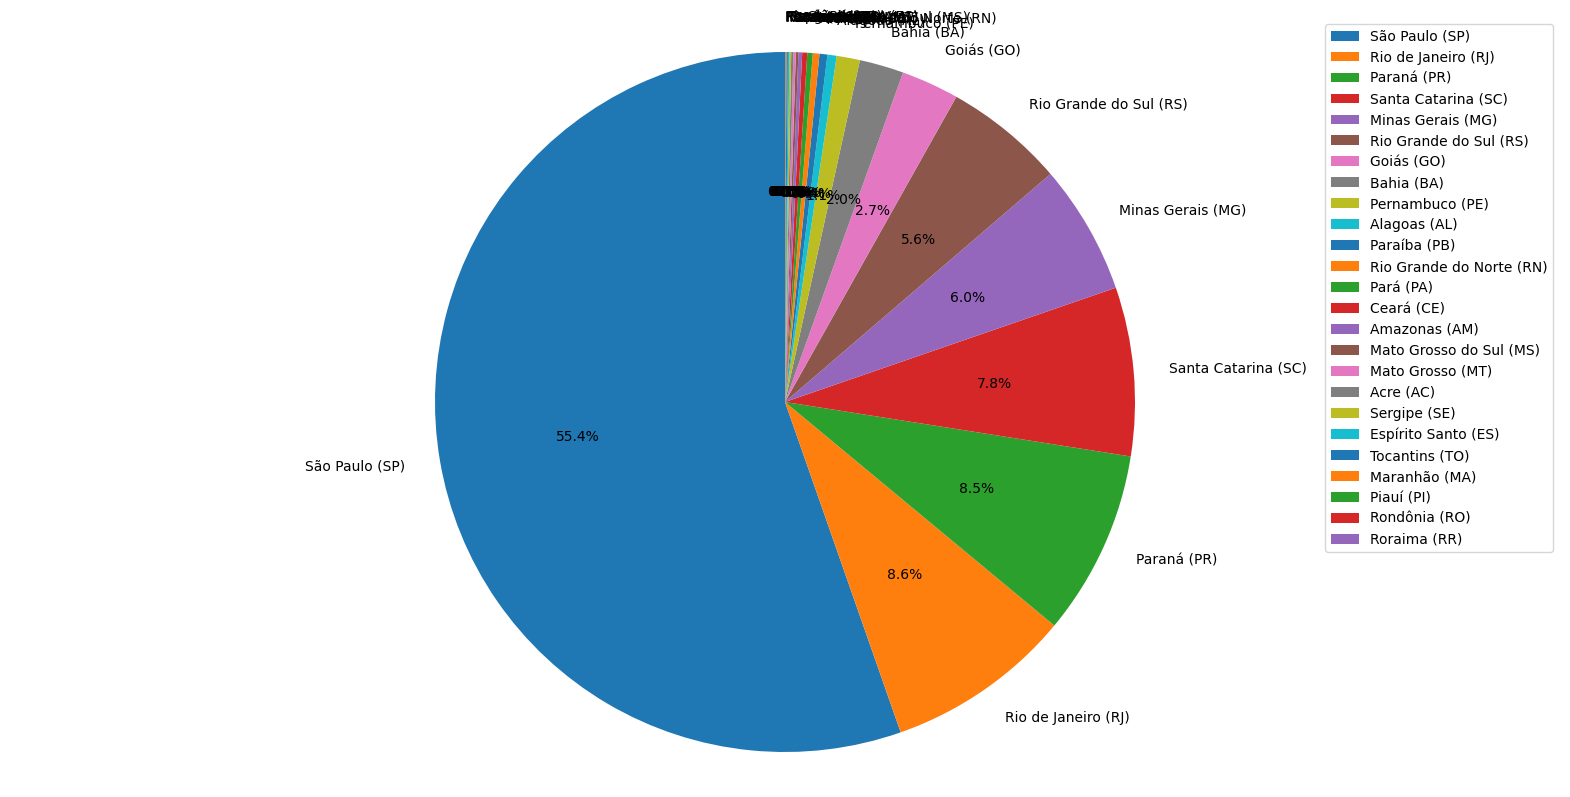

In [6]:
plt.rcParams['figure.figsize'] = [20,10]
plt.pie(df_plot['estado_vendedor'], labels=df_plot.index, shadow = False, startangle = 90, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend()


In [75]:
manufacturer_values = car_dataset['marca'].value_counts()

In [8]:
car_dataset['marca'] = car_dataset['marca'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [65]:
#region_values = vendedor
#car_dataset['estado_vendedor'] = car_dataset['estado_vendedor'].apply(lambda x: x if str(x) in vendedor[:50] else 'others')

In [9]:
model_values =car_dataset['marca'].value_counts()
car_dataset['marca'] = car_dataset['marca'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [10]:
for i in car_dataset.columns:
  print(i, len(car_dataset[i].value_counts().index))

id 29584
num_fotos 14
marca 21
modelo 457
versao 1916
ano_de_fabricacao 35
ano_modelo 17
hodometro 26004
cambio 7
num_portas 3
tipo 7
blindado 2
cor 7
tipo_vendedor 2
cidade_vendedor 575
estado_vendedor 25
anunciante 4
entrega_delivery 2
troca 2
elegivel_revisao 1
dono_aceita_troca 1
veiculo_único_dono 1
revisoes_concessionaria 1
ipva_pago 1
veiculo_licenciado 1
garantia_de_fábrica 1
revisoes_dentro_agenda 1
veiculo_alienado 0
preco 29584


Numerical Data Cleaning




In [11]:
car_dataset.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,NaN,1.330239e+05
std,3.487334,4.062422,2.673930,32561.769309,0.338360,NaN,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,NaN,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,NaN,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,NaN,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,NaN,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,NaN,1.359813e+06


In [12]:
price_percentile25 = car_dataset['preco'].quantile(0.25)
price_percentile75 = car_dataset['preco'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25

In [13]:
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = car_dataset['preco'].quantile(0.15)

In [14]:
new_df = car_dataset[(car_dataset['preco'] < price_upper_limit) & (car_dataset['preco'] > price_lower_limit)]

In [15]:
odometer_percentile75 = car_dataset['hodometro'].quantile(0.75)
odometer_percentile25 = car_dataset['hodometro'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = car_dataset['hodometro'].quantile(0.05)

In [16]:
new_df = new_df[(new_df['hodometro'] < odometer_upper_limit) & (new_df['hodometro'] > odometer_lower_limit)]

In [17]:
new_df.shape

(22511, 29)

Feature Engineering¶


In [18]:
new_df.sample(5)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
12674,22492823298596744930173820395642112695,8.0,VOLKSWAGEN,AMAROK,3.0 V6 TDI DIESEL HIGHLINE CD 4MOTION AUTOMÁTICO,2018,2019.0,82187.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,195203.132334
7080,21160224933681233319221717924080706368,8.0,BMW,320i,2.0 SPORT 16V TURBO ACTIVE FLEX 4P AUTOMÁTICO,2015,2016.0,81655.0,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,NaN,NaN,128552.218315
1241,131186363812802428142855803756270877213,16.0,CHEVROLET,TRACKER,1.8 MPFI LTZ 4X2 16V FLEX 4P AUTOMÁTICO,2014,2014.0,94683.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79694.393921
10439,129733145314293508005977740503013366919,8.0,MITSUBISHI,OUTLANDER,3.0 GT 4X4 V6 24V GASOLINA 4P AUTOMÁTICO,2015,2016.0,77007.0,Automática,4,...,False,NaN,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,106297.040159
17673,318508582452977259745057720854077522104,8.0,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2017,2018.0,68384.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,140836.968225


In [19]:
new_df['hodometro'] = new_df['hodometro'].astype(int)

In [20]:
new_df['ano_modelo'] = new_df['ano_modelo'].astype(int)

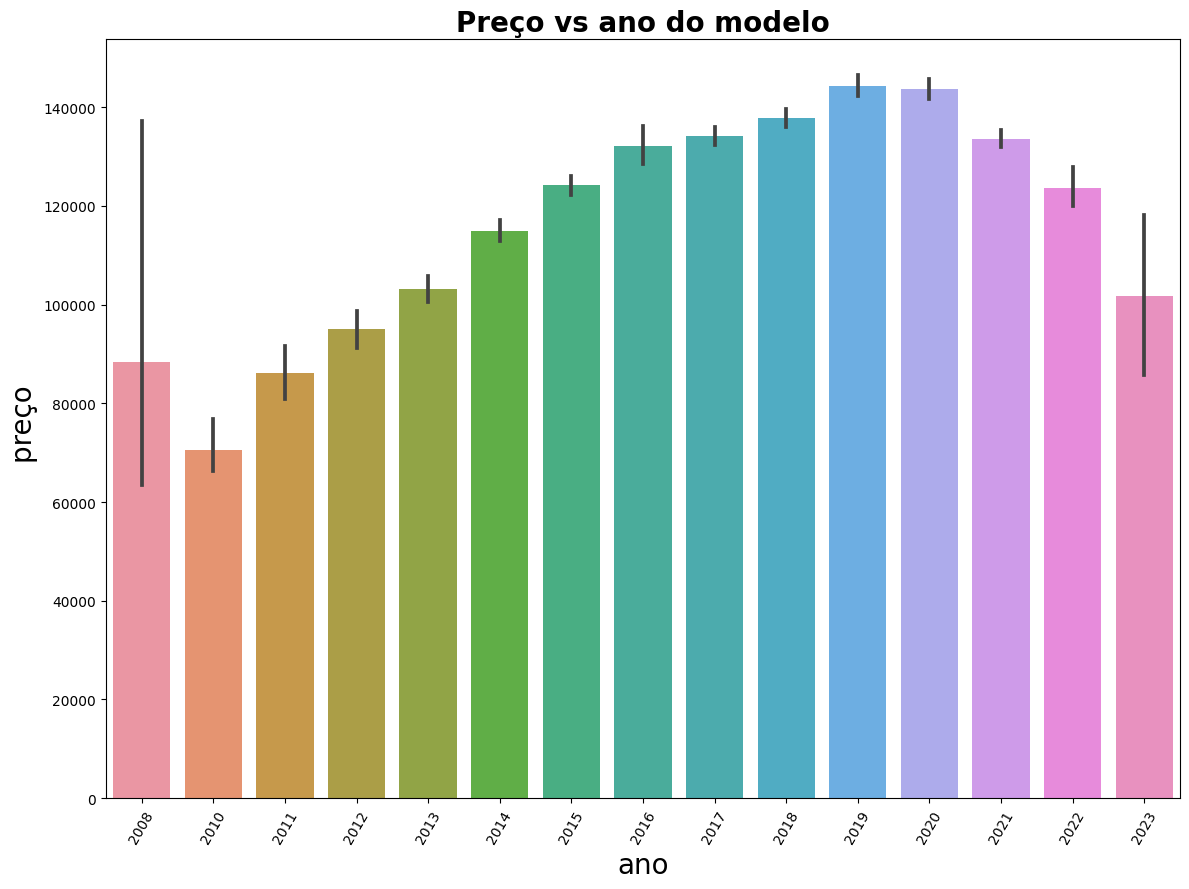

In [21]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=new_df['preco'],x=new_df['ano_modelo'])
plt.title("Preço vs ano do modelo",fontsize=20,fontweight ='bold')
plt.xlabel('ano',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('preço ',fontsize = 20)
plt.tight_layout()
plt.show()

In [22]:
new_df['idade_carro'] = 2023 - new_df['ano_modelo']
new_df.drop(['ano_modelo'], axis = 1, inplace = True)
new_df.describe()

,num_fotos,ano_de_fabricacao,hodometro,num_portas,veiculo_alienado,preco,idade_carro
count,22351.000000,22511.000000,22511.000000,22511.000000,0.0,22511.000000,22511.000000
mean,10.317570,2017.121674,57890.216428,3.949802,NaN,133181.015839,5.052597
std,3.475539,3.153793,27736.124453,0.312004,NaN,53583.604480,2.443404
min,8.000000,1990.000000,11830.000000,2.000000,NaN,62226.485320,0.000000
25%,8.000000,2015.000000,33208.500000,4.000000,NaN,89884.833197,3.000000
50%,8.000000,2018.000000,57240.000000,4.000000,NaN,122159.460177,5.000000
75%,14.000000,2019.000000,79946.500000,4.000000,NaN,162543.174980,6.000000
max,21.000000,2022.000000,157825.000000,4.000000,NaN,294194.117170,15.000000


In [23]:
sample_data = new_df.sample(100)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


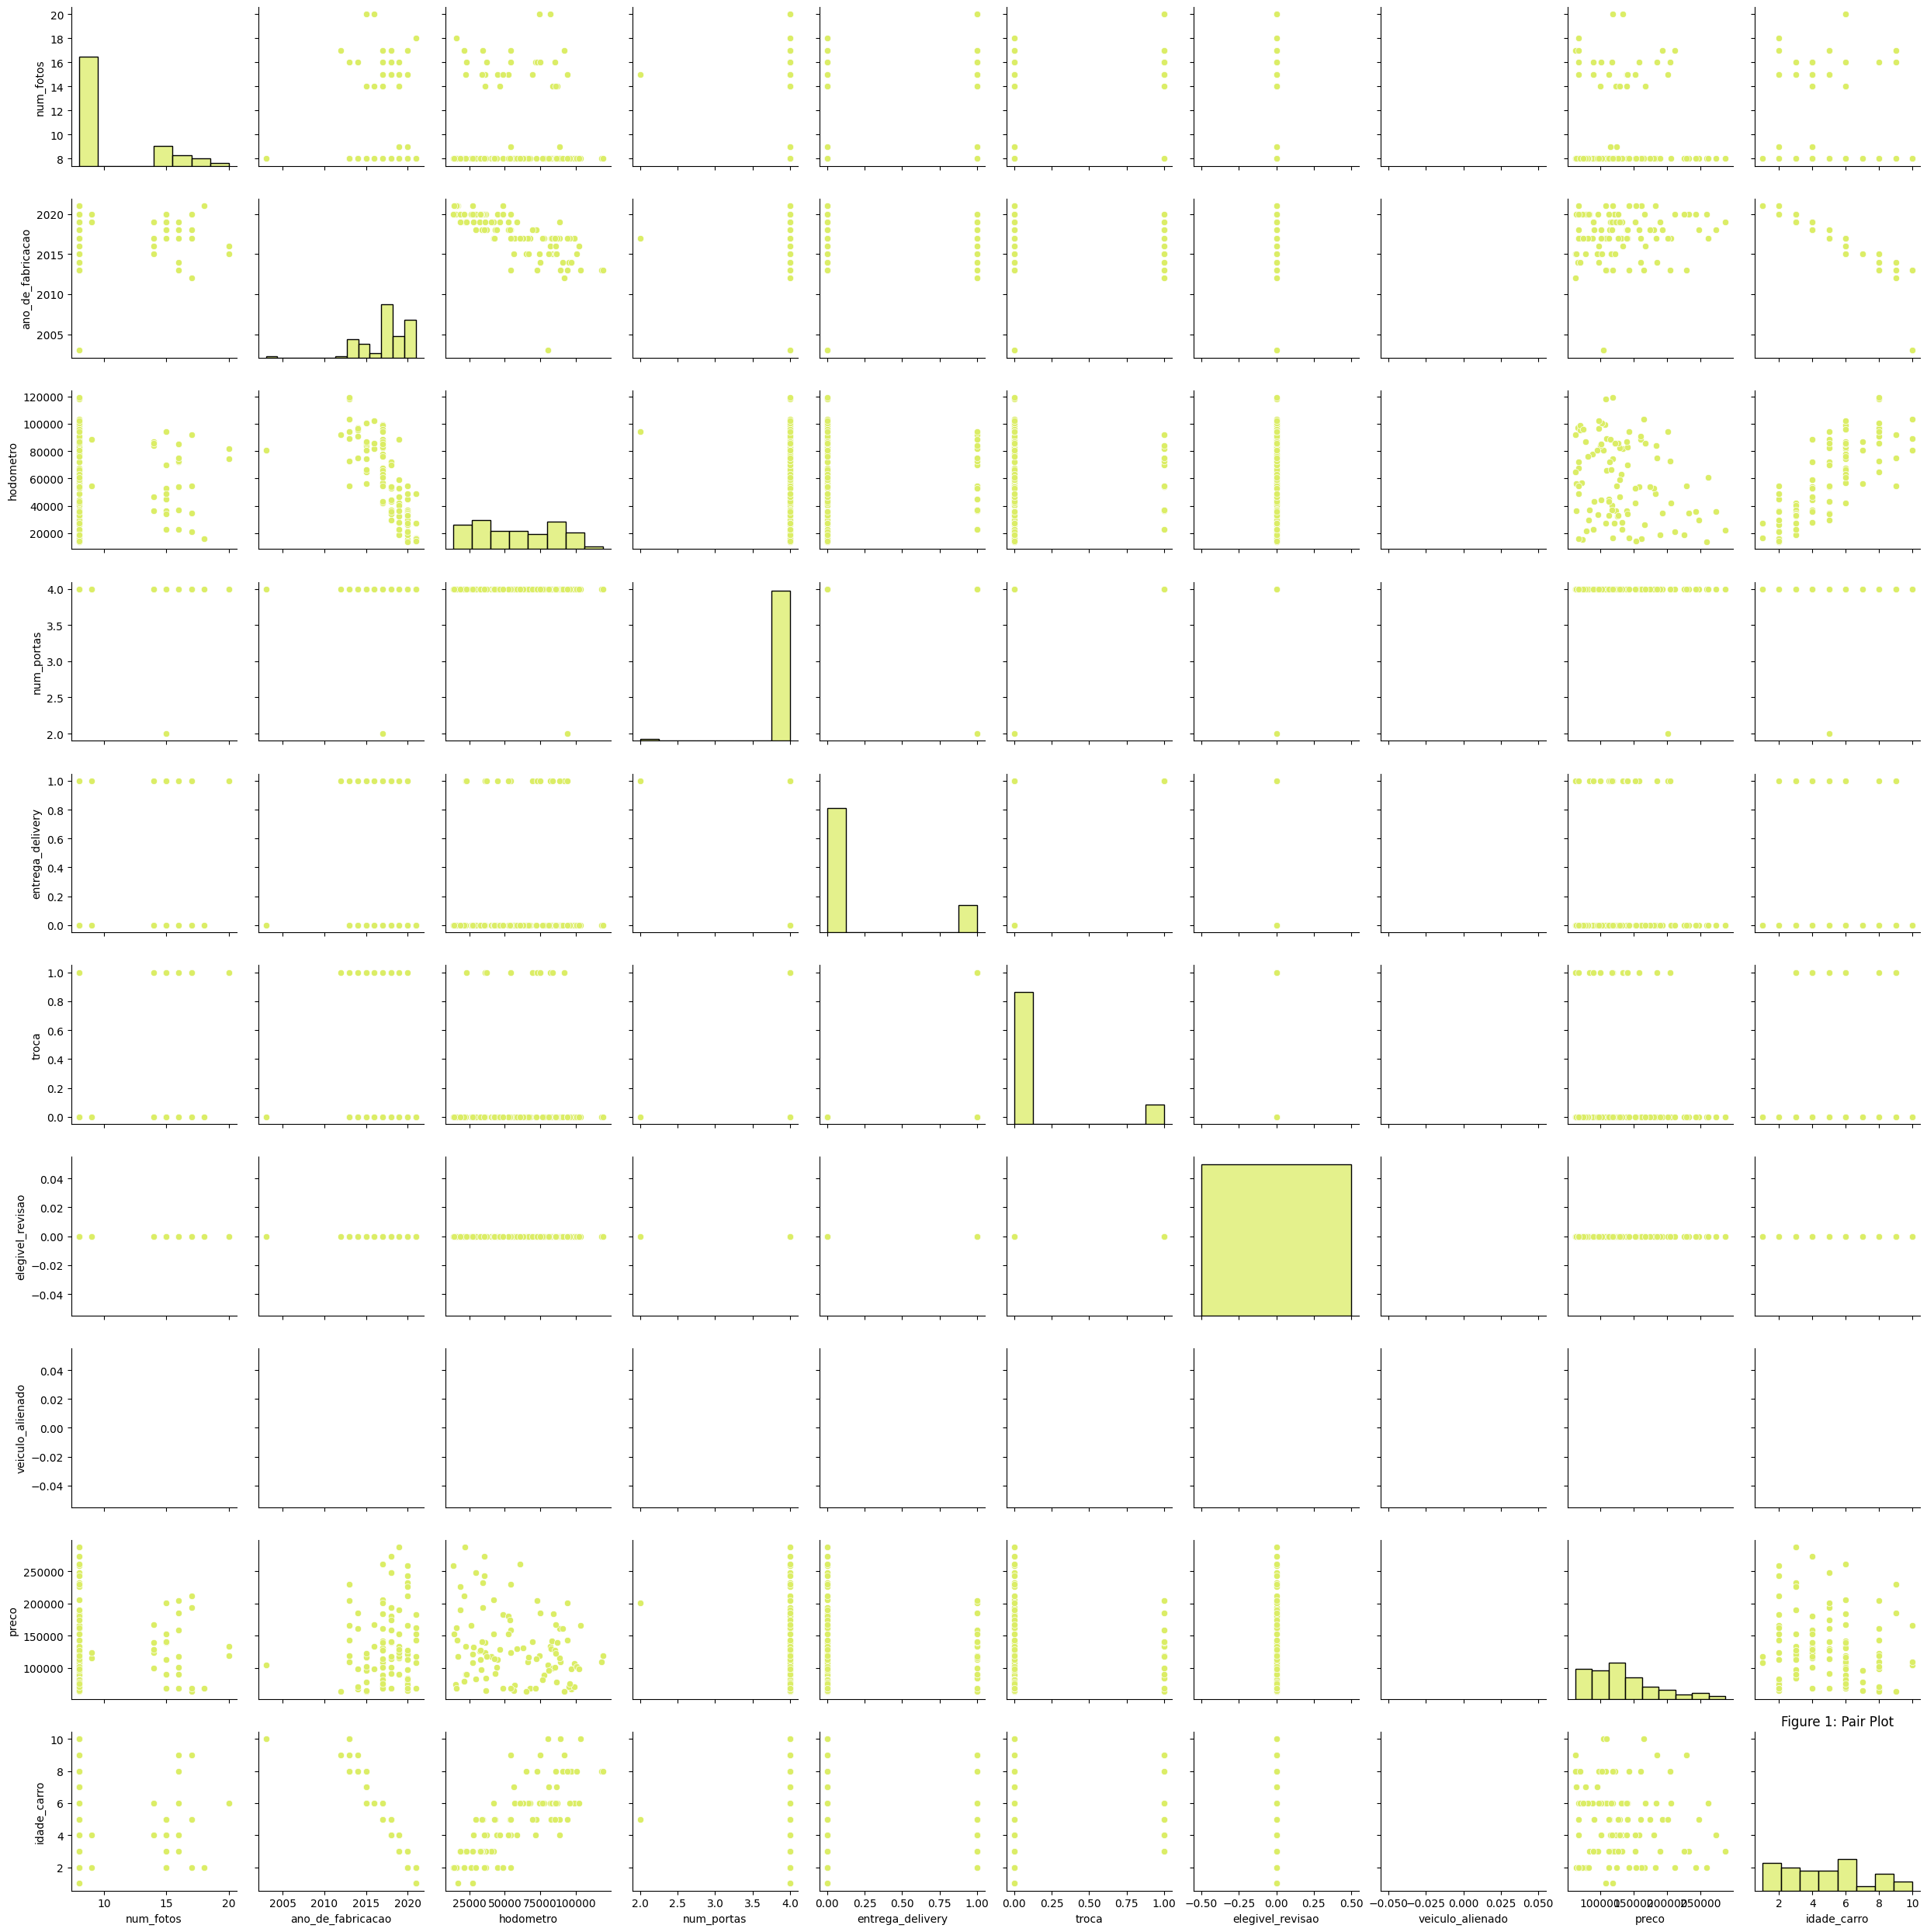

In [27]:
sns.pairplot(sample_data)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

<ipython-input-24-a4ff67bfeb7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True)


<Axes: >

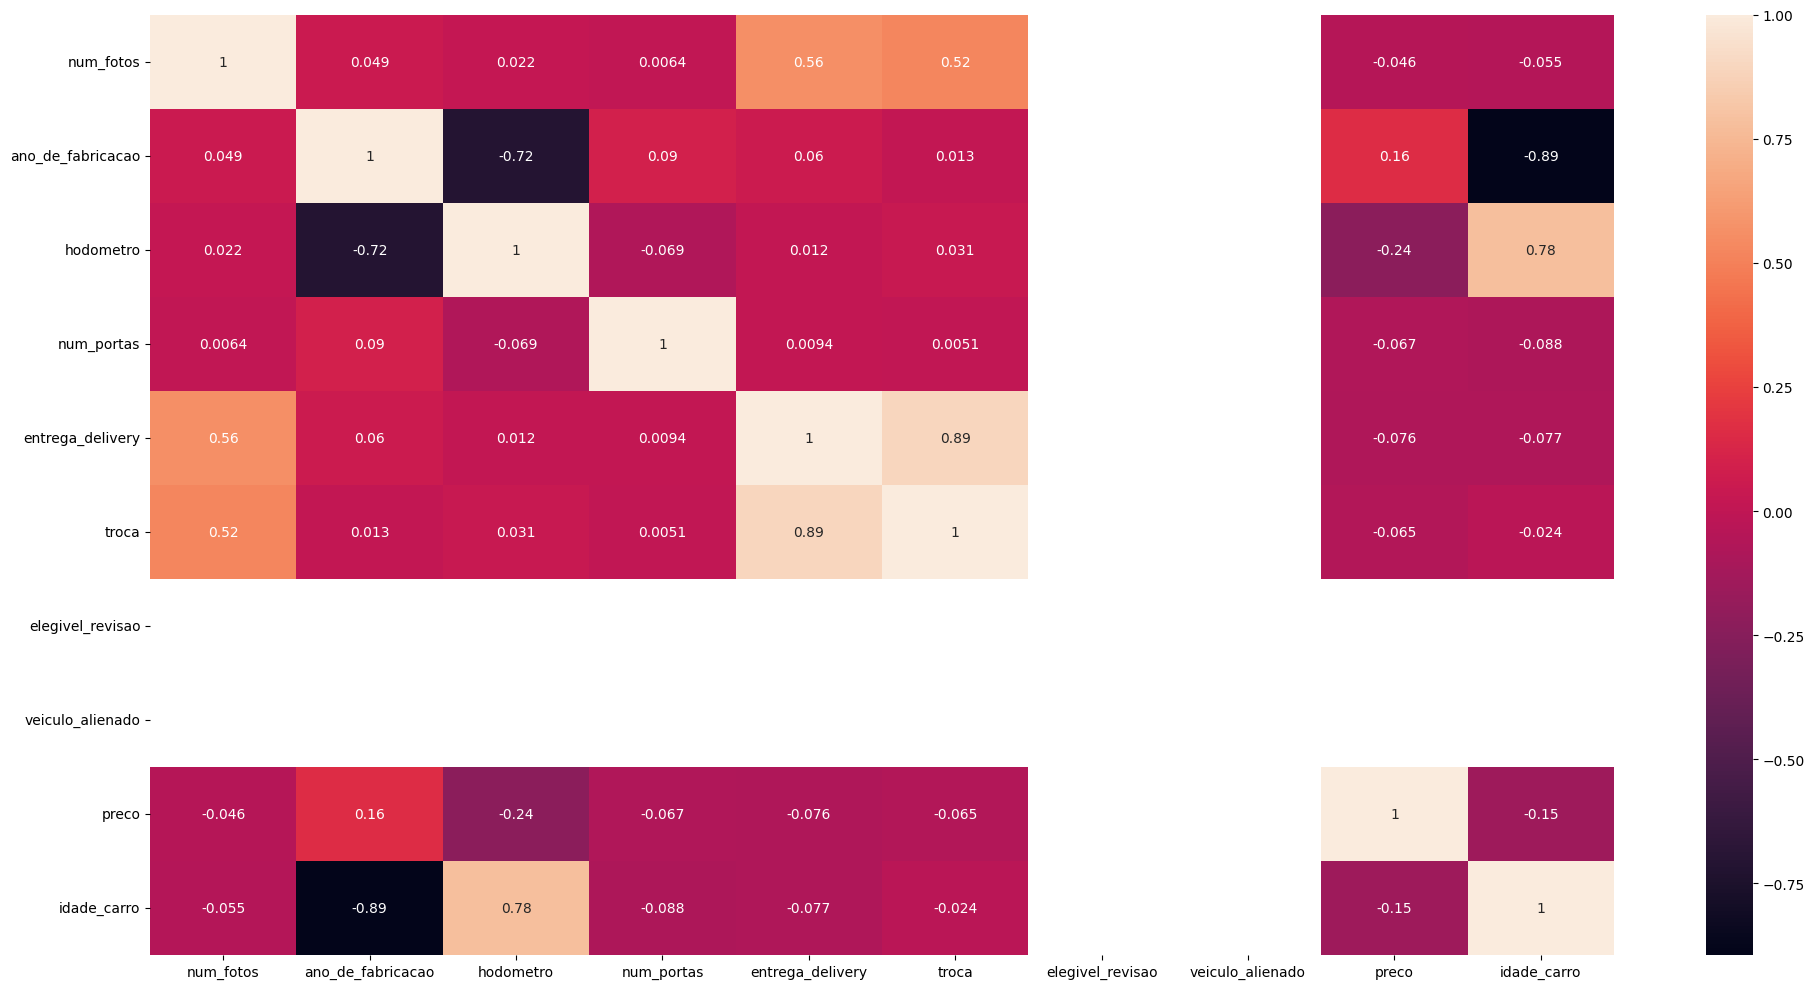

In [24]:
sns.heatmap(new_df.corr(), annot=True)

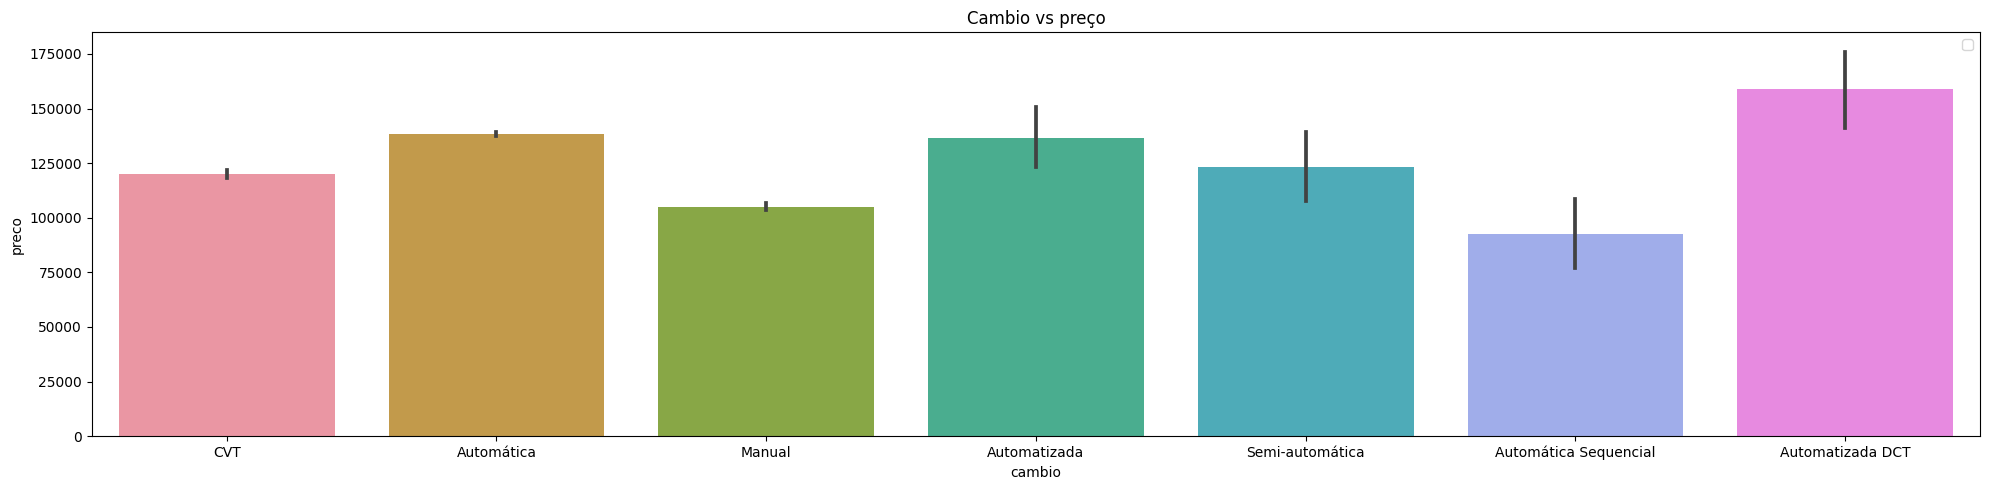

In [25]:
fig,axs=plt.subplots()
fig.set_size_inches(20,5)

p1=sns.barplot(x='cambio',y='preco',data=new_df,ax=axs)
axs.set_title('Cambio vs preço')
plt.legend()
plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

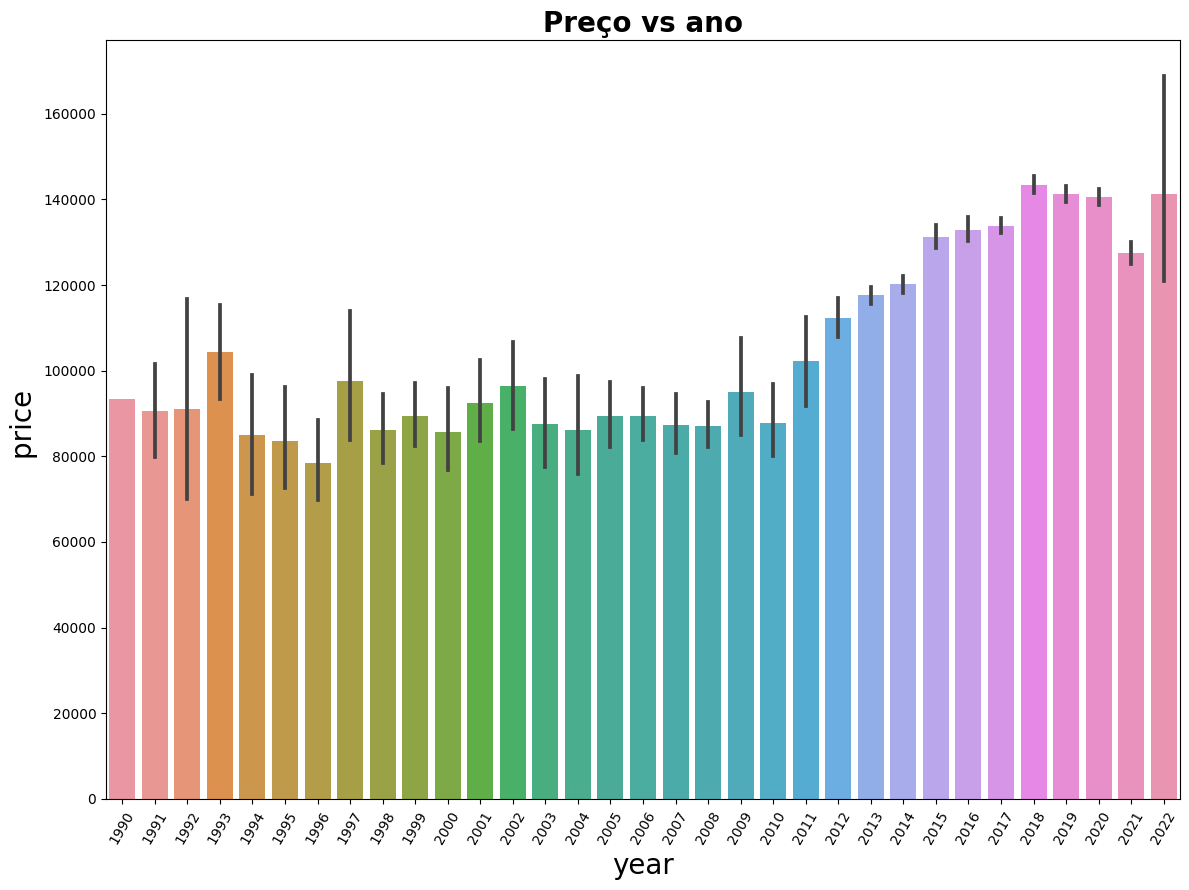

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=new_df['preco'],x=new_df['ano_de_fabricacao'])
plt.title("Preço vs ano",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

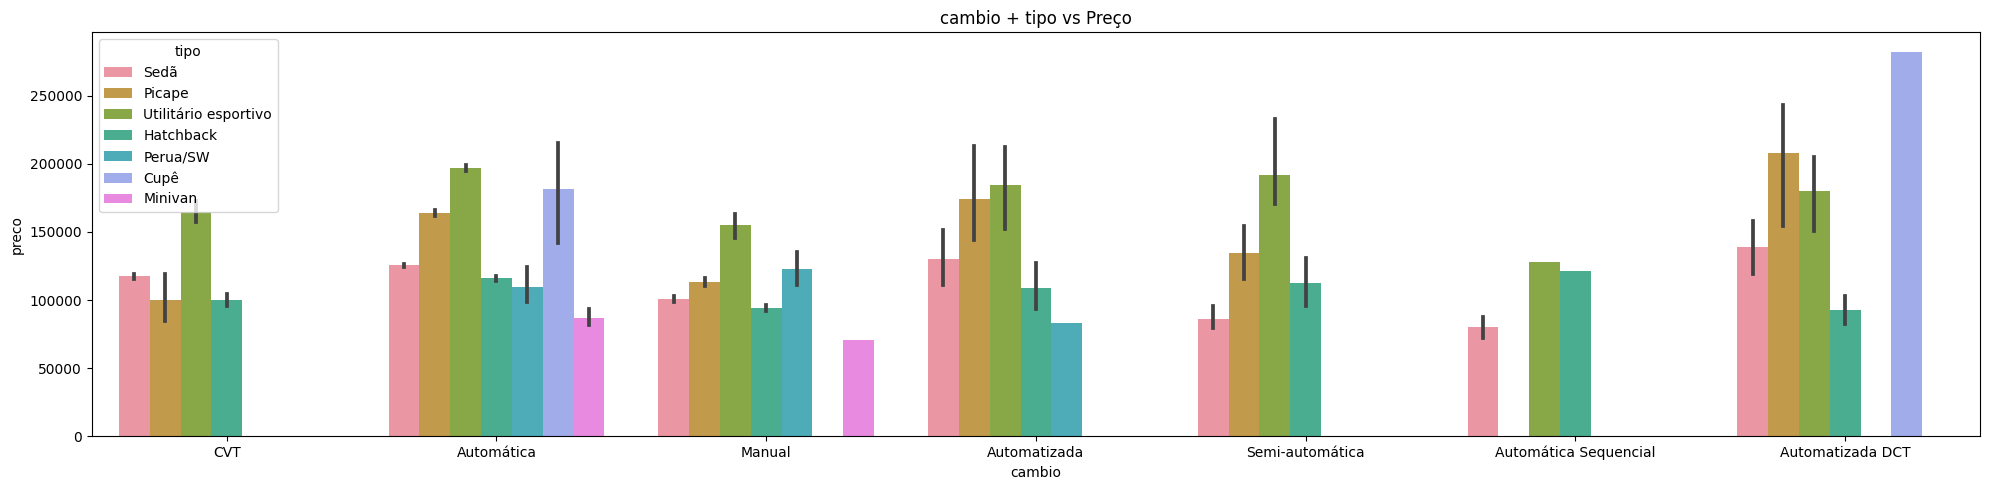

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(x='cambio',y='preco', hue='tipo',data=new_df)
plt.title('cambio + tipo vs Preço')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

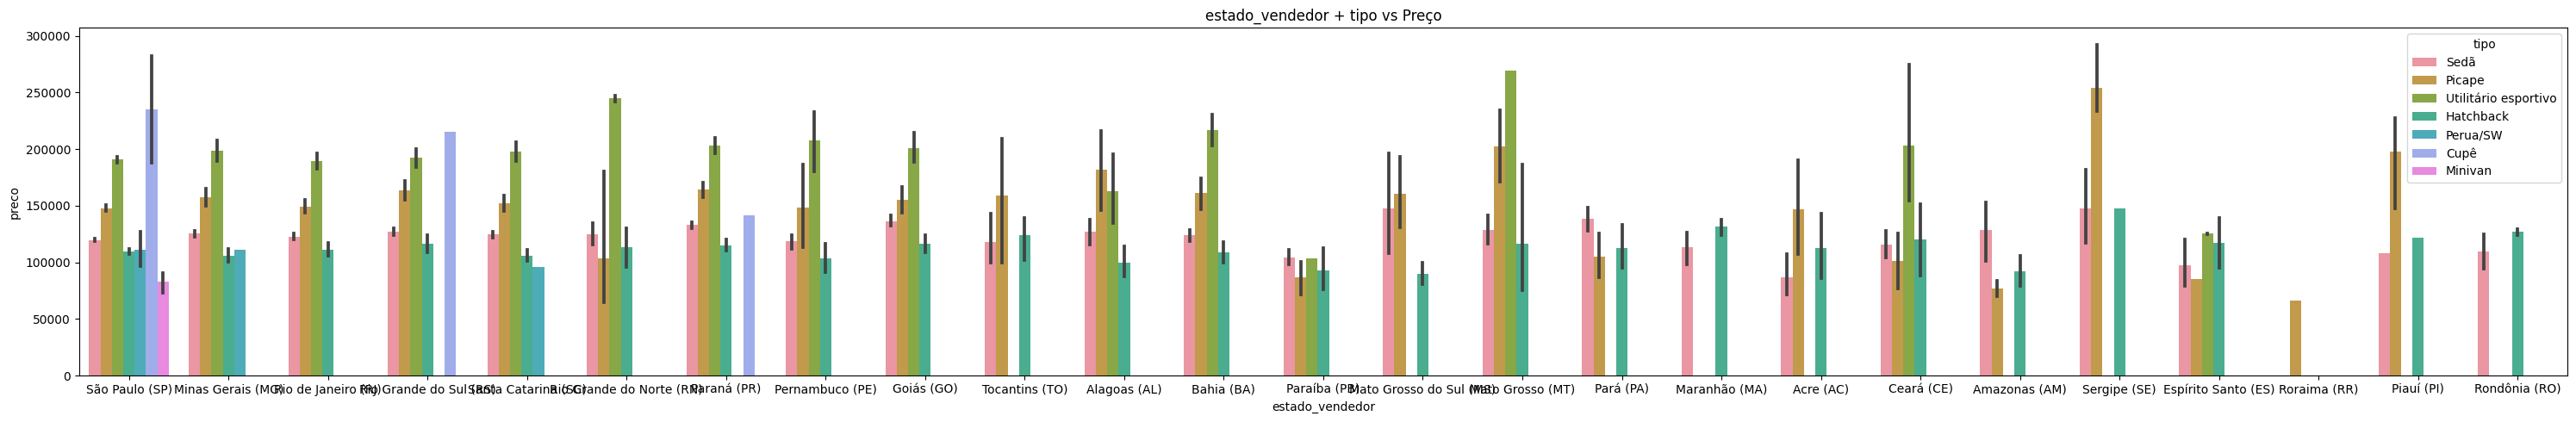

In [30]:
plt.figure(figsize=(30,5))
sns.barplot(x='estado_vendedor',y='preco', hue='tipo',data=new_df)
plt.title('estado_vendedor + tipo vs Preço')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

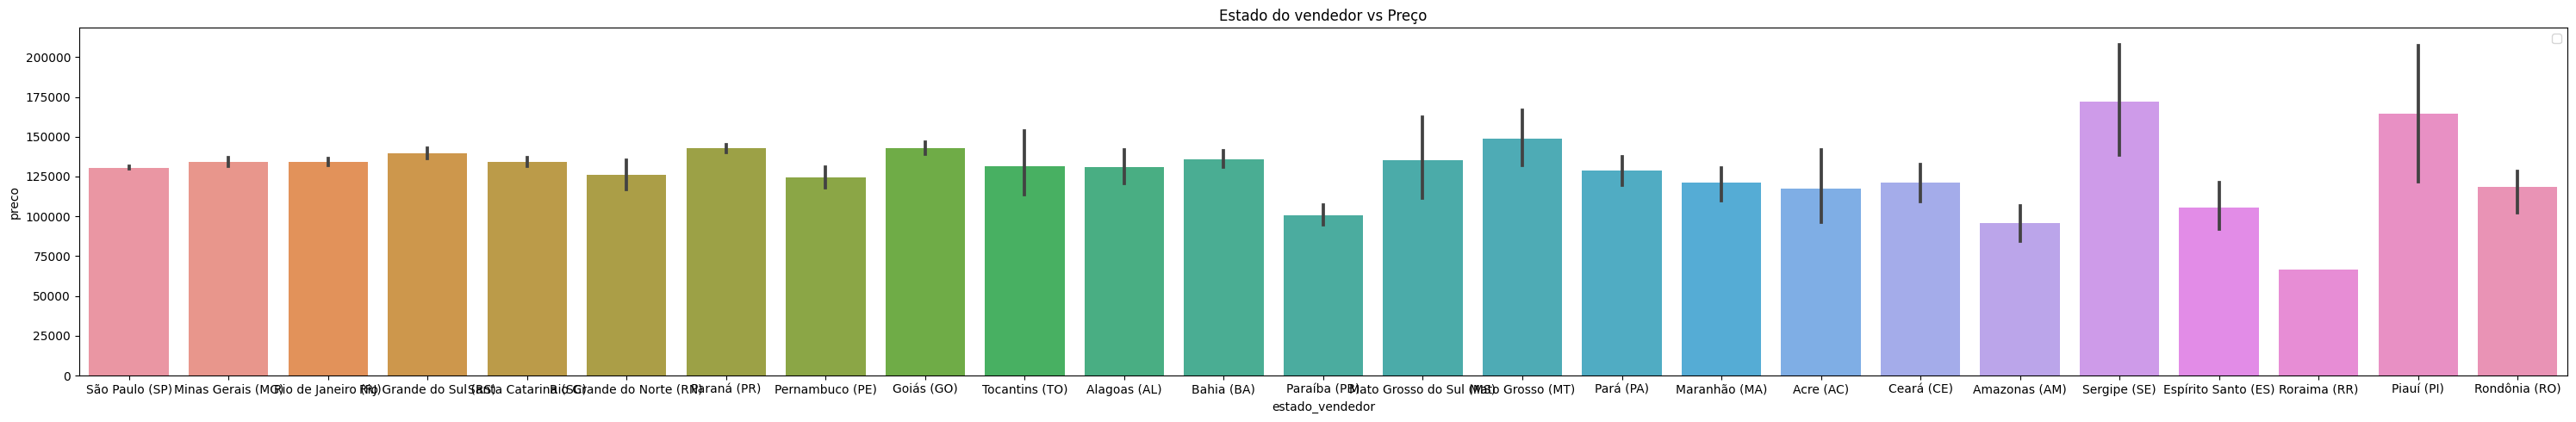

In [32]:
fig,axs=plt.subplots()
fig.set_size_inches(30,5)

p1=sns.barplot(x='estado_vendedor',y='preco',data=new_df,ax=axs)
axs.set_title('Estado do vendedor vs Preço')
plt.legend()
plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

In [33]:
car_dataset['garantia_de_fábrica'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29584 entries, 0 to 29583
Series name: garantia_de_fábrica
Non-Null Count  Dtype 
--------------  ----- 
4365 non-null   object
dtypes: object(1)
memory usage: 231.2+ KB


In [34]:
car_dataset['garantia_de_fábrica'].isnull()

0         True
1         True
2         True
3         True
4        False
         ...  
29579    False
29580    False
29581     True
29582     True
29583     True
Name: garantia_de_fábrica, Length: 29584, dtype: bool

xx


In [58]:
car_dataset['modelo'].info


<bound method Series.info of 0          KICKS
1        COMPASS
2        SORENTO
3         AMAROK
4        KORANDO
          ...   
29579      HILUX
29580       POLO
29581      HILUX
29582       2008
29583         Q7
Name: modelo, Length: 29584, dtype: object>

In [59]:
car_dataset['tipo'].info

<bound method Series.info of 0                        Sedã
1                        Sedã
2                        Sedã
3                      Picape
4        Utilitário esportivo
                 ...         
29579                  Picape
29580                  Picape
29581                  Picape
29582                    Sedã
29583    Utilitário esportivo
Name: tipo, Length: 29584, dtype: object>

In [35]:
tipo_filtrado = car_dataset['tipo']
df_plot = pd.DataFrame(tipo_filtrado.value_counts())
df_plot.head()

,tipo
Sedã,16429
Hatchback,4924
Picape,4849
Utilitário esportivo,3322
Perua/SW,27


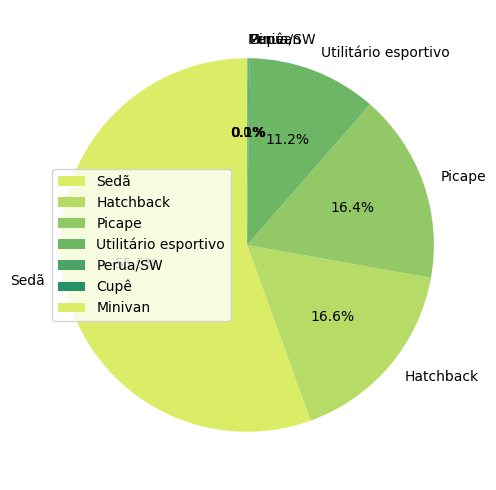

In [36]:
plt.rcParams['figure.figsize'] = [5,5]
plt.pie(df_plot['tipo'], labels=df_plot.index, shadow = False, startangle = 90, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend()
#plt.savefig('marcas.png', format = 'png')

In [37]:
picapex = car_dataset['tipo']=='picape'

In [38]:
estadox = car_dataset['estado_vendedor']

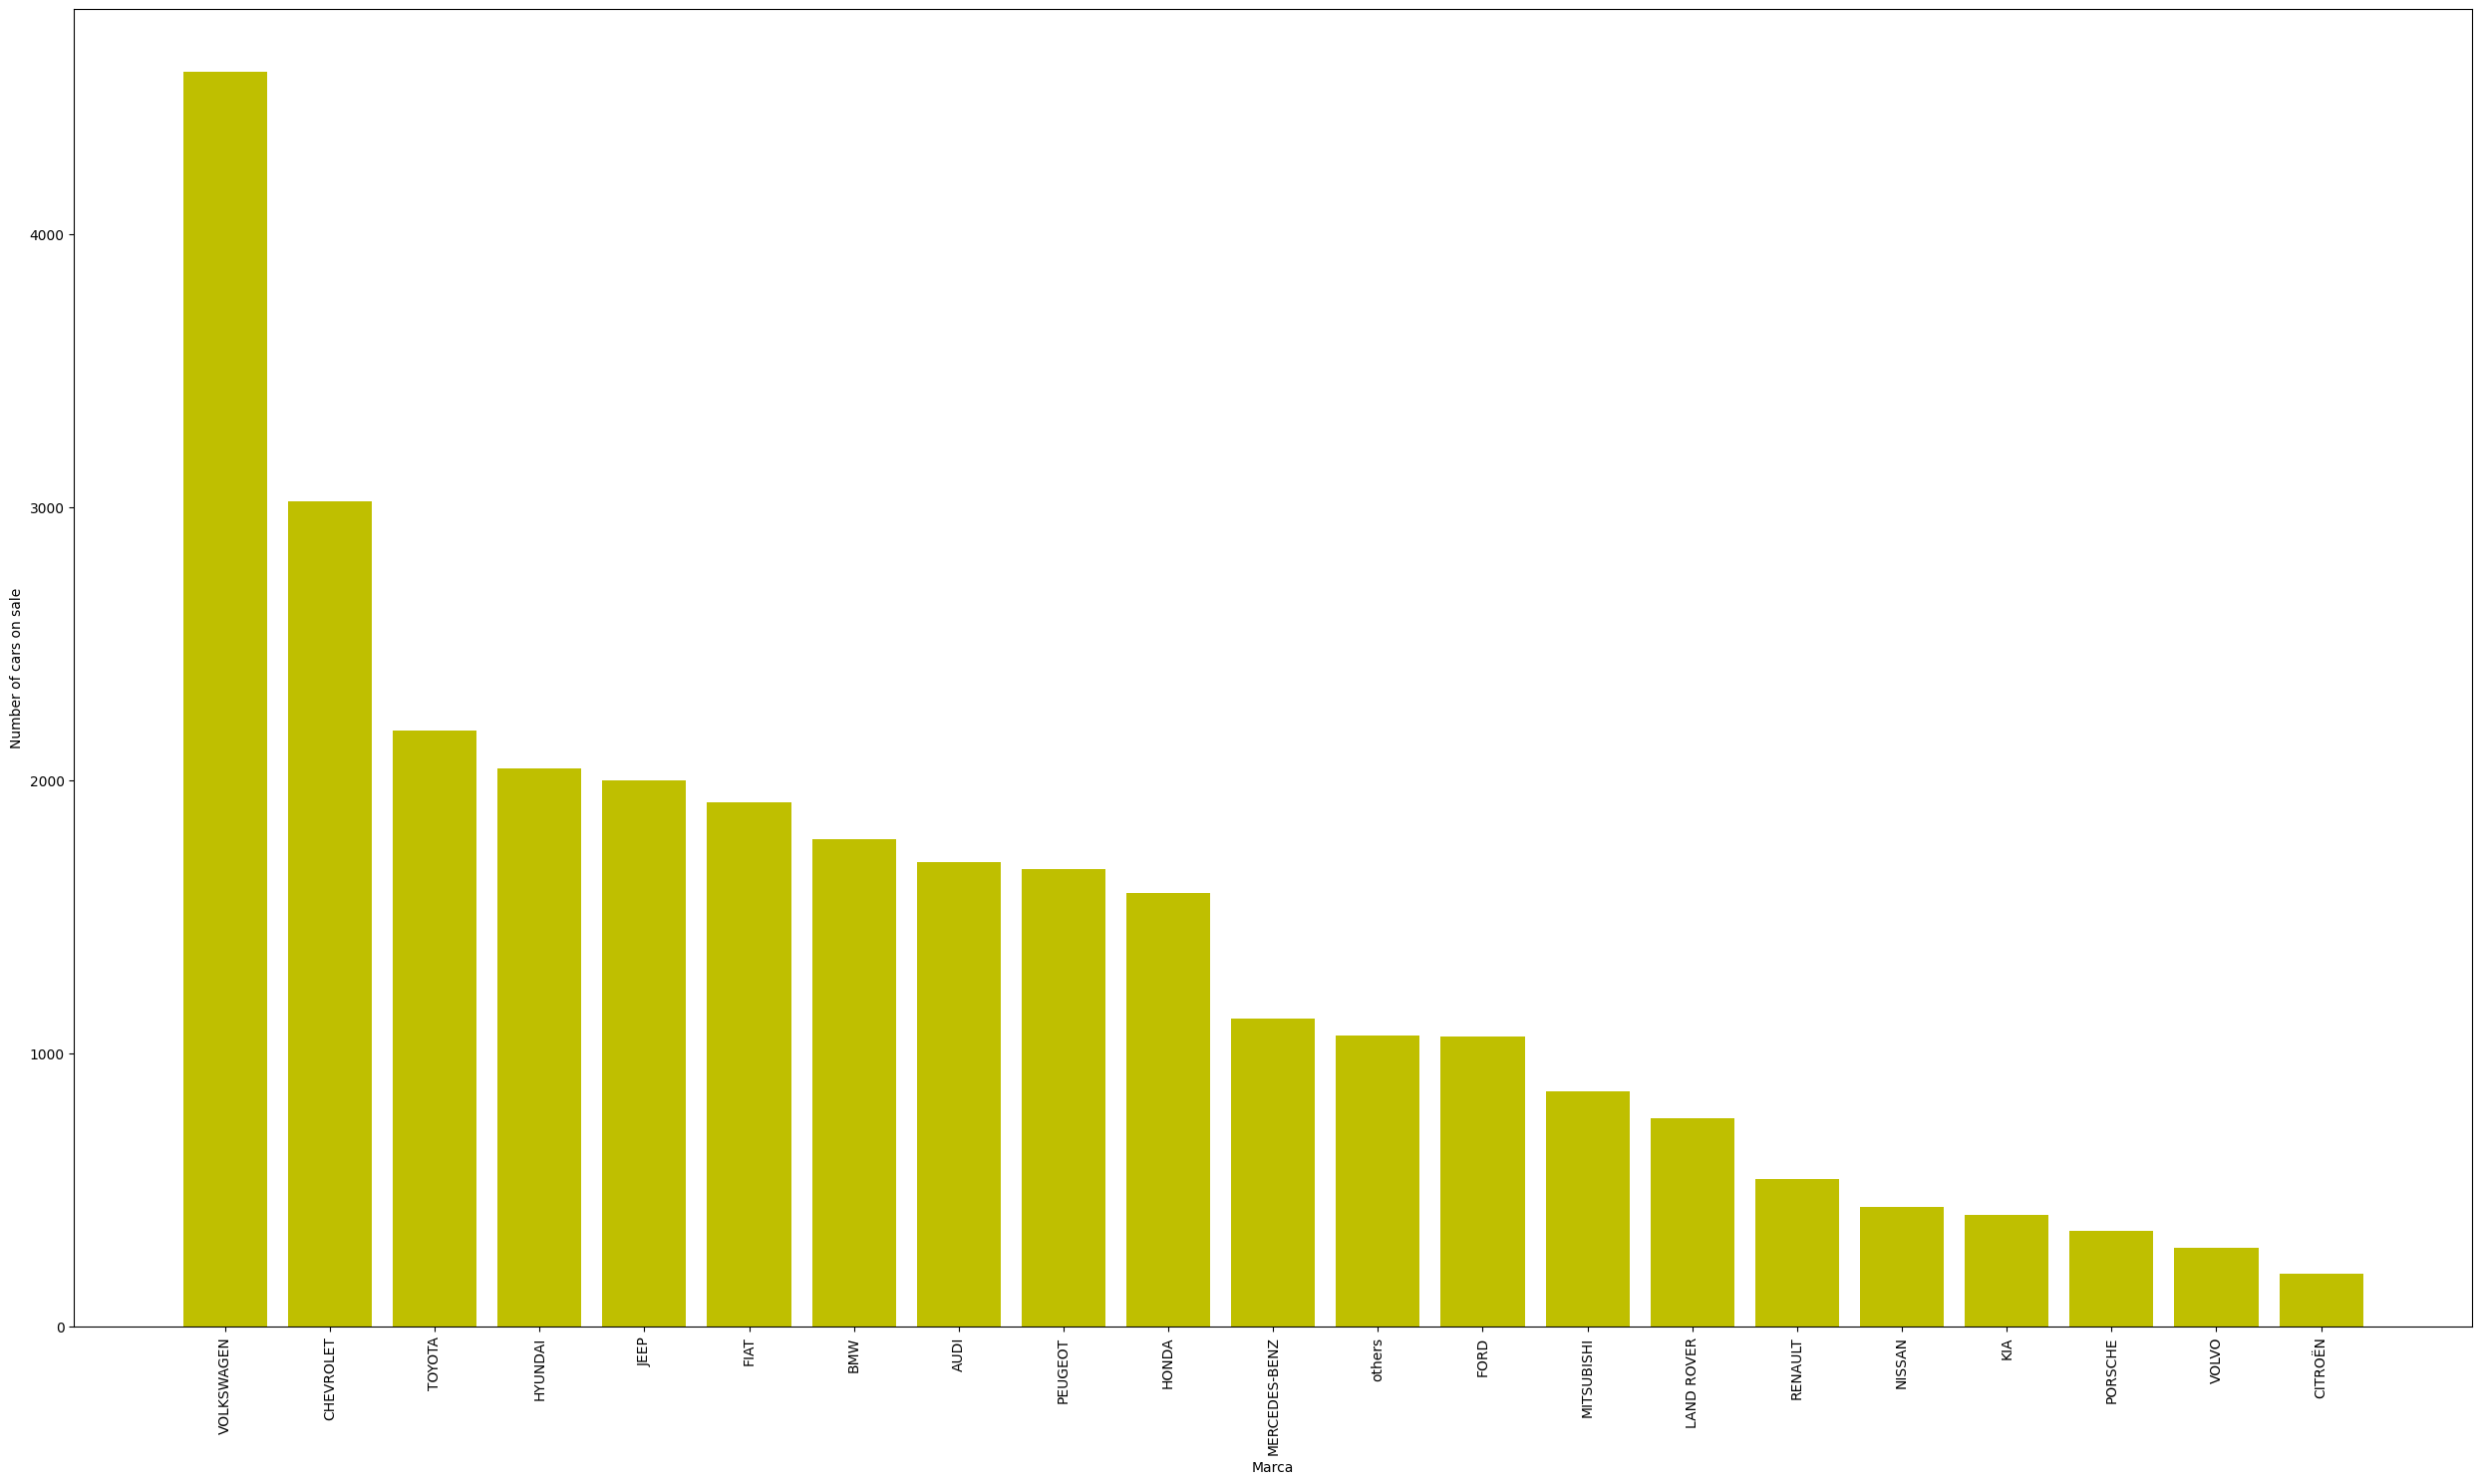

In [40]:
manufacturers_counts = car_dataset['marca'].value_counts().to_dict()
fig = plt.figure(figsize=(25, 15), dpi= 100, facecolor='w', edgecolor='w')
plt.bar(manufacturers_counts.keys(),manufacturers_counts.values(),color='y')
plt.xticks(rotation = 90);
plt.xlabel('Marca');
plt.ylabel('Number of cars on sale');

In [41]:
car_dataset['tipo'].replace(to_replace=[{'sedã','seda'}], inplace=True)

In [42]:
car_dataset['tipo'].value_counts().sort_values(ascending=False).head()

Sedã                    16429
Hatchback                4924
Picape                   4849
Utilitário esportivo     3322
Perua/SW                   27
Name: tipo, dtype: int64

In [43]:
novo = car_dataset[car_dataset['tipo']=='picape']['estado_vendedor'].value_counts().sort_values(ascending=False).head(1)


In [44]:
print(novo)

Series([], Name: estado_vendedor, dtype: int64)


aaa

In [45]:
joins = car_dataset[['marca','tipo','preco']]

join_group =joins.groupby('tipo').mean().head(5).sort_values('preco',ascending=False)


join_group

<ipython-input-45-a06e41fba548>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  join_group =joins.groupby('tipo').mean().head(5).sort_values('preco',ascending=False)


,preco
tipo,
Cupê,413260.359561
Picape,158906.210818
Perua/SW,110059.507733
Hatchback,92955.616973
Minivan,65217.048192


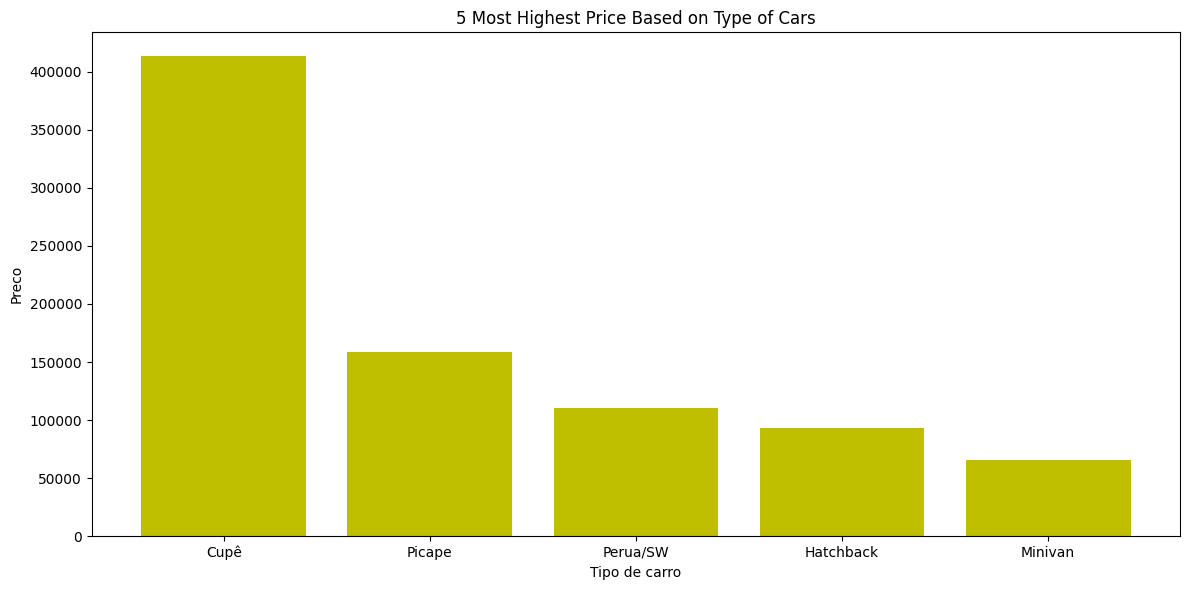

In [46]:
plt.figure(figsize=(12,6))

x=range(5)
plt.bar(x,join_group['preco'], color='y')
plt.xticks(x,join_group.index)
plt.xlabel('Tipo de carro')
plt.ylabel('Preco')
plt.title('5 Most Highest Price Based on Type of Cars')
plt.show()

Separate numerical and categorical feature.



In [47]:
category = ['marca','tipo','cambio','estado_vendedor','cor','ano_de_fabricacao']
numerical = car_dataset.drop(category, axis=1)
categorical = car_dataset[category]
numerical.head()

,id,num_fotos,modelo,versao,ano_modelo,hodometro,num_portas,blindado,tipo_vendedor,cidade_vendedor,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017.0,67772.0,4,N,PF,Rio de Janeiro,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017.0,62979.0,4,N,PF,Belo Horizonte,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2019.0,44070.0,4,N,PJ,Santos,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2015.0,85357.0,4,N,PJ,Sorocaba,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2015.0,71491.0,4,N,PF,Rio de Janeiro,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [48]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marca              29584 non-null  object
 1   tipo               29584 non-null  object
 2   cambio             29584 non-null  object
 3   estado_vendedor    29584 non-null  object
 4   cor                29584 non-null  object
 5   ano_de_fabricacao  29584 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [49]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_modelo               29584 non-null  float64
 5   hodometro                29584 non-null  float64
 6   num_portas               29584 non-null  int64  
 7   blindado                 29584 non-null  object 
 8   tipo_vendedor            29584 non-null  object 
 9   cidade_vendedor          29584 non-null  object 
 10  anunciante               29584 non-null  object 
 11  entrega_delivery         29584 non-null  bool   
 12  troca                    29584 non-null  bool   
 13  elegivel_revisao         29584 non-null  bool   
 14  dono_aceita_troca     

In [50]:
numerical.isnull().sum().sort_values(ascending=False)


veiculo_alienado           29584
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
revisoes_concessionaria    20412
veiculo_único_dono         19161
veiculo_licenciado         13678
ipva_pago                   9925
dono_aceita_troca           7662
num_fotos                    177
id                             0
troca                          0
elegivel_revisao               0
entrega_delivery               0
anunciante                     0
cidade_vendedor                0
tipo_vendedor                  0
blindado                       0
num_portas                     0
hodometro                      0
ano_modelo                     0
versao                         0
modelo                         0
preco                          0
dtype: int64

In [51]:
# fill categorical with mode
for cat in categorical:
    mode = categorical[cat].mode().values[0]
    categorical[cat]=car_dataset[cat].fillna(mode)

<ipython-input-51-379728c5147a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[cat]=car_dataset[cat].fillna(mode)
<ipython-input-51-379728c5147a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[cat]=car_dataset[cat].fillna(mode)
<ipython-input-51-379728c5147a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [52]:
#concat table categorical and numerical to create new table without missing values
df2 = pd.concat([categorical,numerical],axis=1)
df2.head()

,marca,tipo,cambio,estado_vendedor,cor,ano_de_fabricacao,id,num_fotos,modelo,versao,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,NISSAN,Sedã,CVT,São Paulo (SP),Branco,2017,300716223898539419613863097469899222392,8.0,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,JEEP,Sedã,Automática,Minas Gerais (MG),Branco,2017,279639842134129588306469566150288644214,8.0,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,KIA,Sedã,Automática,São Paulo (SP),Preto,2018,56414460810621048900295678236538171981,16.0,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,VOLKSWAGEN,Picape,Automática,São Paulo (SP),Branco,2013,56862509826849933428086372390159405545,14.0,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,others,Utilitário esportivo,Automática,Rio de Janeiro (RJ),Preto,2013,338980975753200343894519909855598027197,8.0,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891



Preço do tipo de carro por cada tipo de cambio



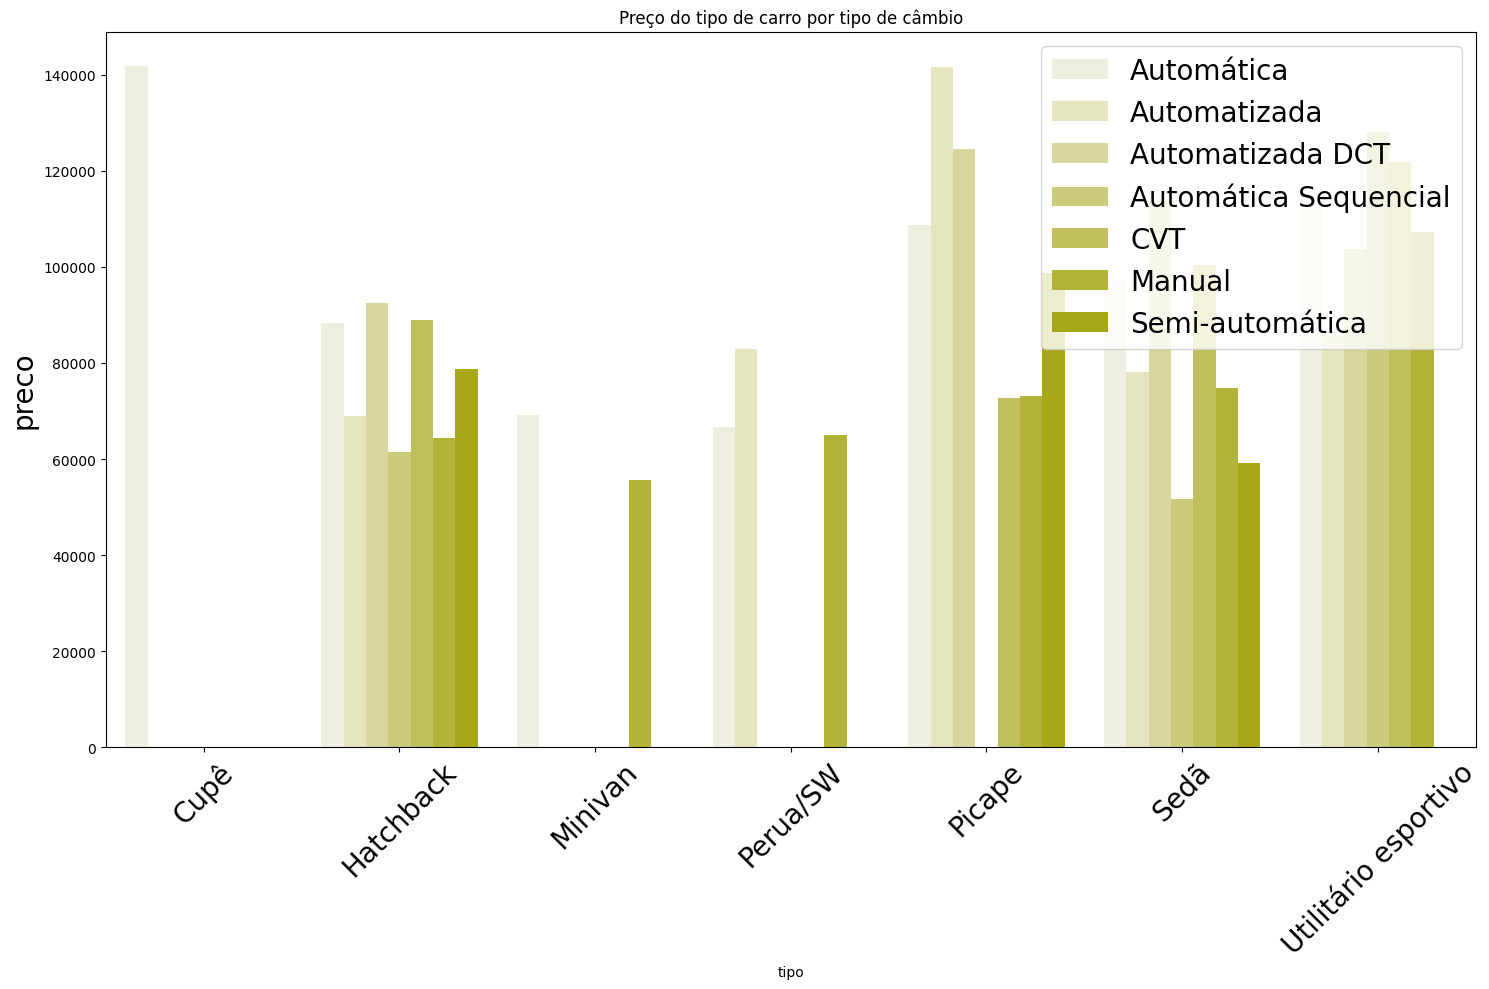

In [53]:
try2=car_dataset[['tipo','cambio','preco']][car_dataset['preco']<=150000].groupby(['tipo','cambio']).mean()
try2.reset_index(level=0,inplace=True)
try2.reset_index(level=0,inplace=True)
try2=try2.sort_values(['tipo','cambio'])
plt.figure(figsize=(15,10))
sns.barplot(x='tipo', y='preco', hue='cambio', data=try2, color='y')
plt.xticks(rotation=45,fontsize=20)
plt.ylabel('preco',fontsize=20)
plt.legend(fontsize=20)
plt.title('Preço do tipo de carro por tipo de câmbio');

In [54]:
# Sorting the order of regions from which cars listed

car_dataset['estado_vendedor'].value_counts().sort_values(ascending=False).head()

São Paulo (SP)         16378
Rio de Janeiro (RJ)     2548
Paraná (PR)             2526
Santa Catarina (SC)     2302
Minas Gerais (MG)       1775
Name: estado_vendedor, dtype: int64

In [55]:
picape1 = car_dataset[car_dataset['tipo']=='picape']['estado_vendedor'].value_counts().sort_values(ascending=False).head(1)
print(picape1)

Series([], Name: estado_vendedor, dtype: int64)


In [56]:
state_counts=car_dataset.groupby('estado_vendedor').agg(
num_listings=('estado_vendedor','size'),
avg_price=('preco','median'))

state_counts.reset_index(inplace=True)
state_counts['state'] = state_counts['estado_vendedor'].str.upper()
state_counts

,estado_vendedor,num_listings,avg_price,state
0,Acre (AC),29,74252.428671,ACRE (AC)
1,Alagoas (AL),125,115211.320272,ALAGOAS (AL)
2,Amazonas (AM),51,73913.765582,AMAZONAS (AM)
3,Bahia (BA),604,114115.687405,BAHIA (BA)
4,Ceará (CE),69,94822.561282,CEARÁ (CE)
5,Espírito Santo (ES),21,91004.706902,ESPÍRITO SANTO (ES)
6,Goiás (GO),789,135520.937217,GOIÁS (GO)
7,Maranhão (MA),7,124370.609094,MARANHÃO (MA)
8,Mato Grosso (MT),33,143197.599365,MATO GROSSO (MT)
9,Mato Grosso do Sul (MS),35,107728.809634,MATO GROSSO DO SUL (MS)


In [58]:
#% do tipo de carro porr estado
# Filter the dataframe for electric cars
picape = car_dataset[car_dataset['tipo'] == 'picape']

# Group the data by state and count occurrences
state_counts = picape['estado_vendedor'].value_counts()

# Calculate the total number of electric cars
total_picape_cars = state_counts.sum()

# Calculate the percentage of electric cars in each state
state_percentages = (state_counts / total_picape_cars) * 100

# Display the result
print(state_percentages)

Series([], Name: estado_vendedor, dtype: float64)


https://www.kaggle.com/code/kostianchik/eda-and-visualization-intro

In [59]:
car_df = car_dataset

In [60]:
car_df.shape, car_df.columns

((29584, 29),
 Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
        'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
        'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
        'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
        'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
        'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
        'revisoes_dentro_agenda', 'veiculo_alienado', 'preco'],
       dtype='object'))

In [61]:
#Let's get info about how many nan's are in our columns
nan_sum_series = car_df.isna().sum().sort_values(ascending=False)

In [62]:
nan_sum_df = nan_sum_series.to_frame(name = 'count_nans')

In [63]:
nan_sum_df['prcnt_distrib'] = (nan_sum_df.count_nans / car_df.shape[0]) * 100

<Axes: >

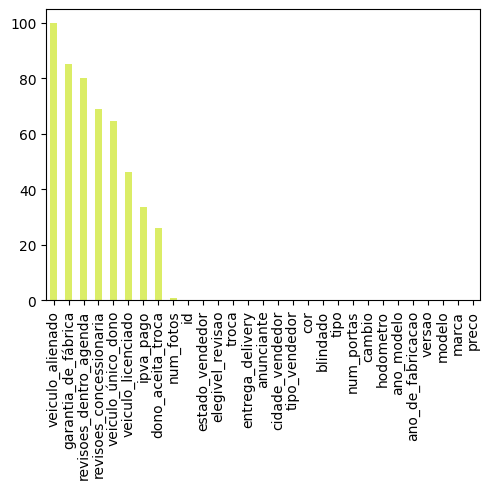

In [64]:
#How looks distribution of nan values to total for every column
nan_sum_df.prcnt_distrib.plot(kind='bar')

In [65]:
#We will work only with those columns, where prcnt_distribution less than 10%
chosen_cols = nan_sum_df[nan_sum_df.prcnt_distrib <= 10].index
chosen_cols

Index(['num_fotos', 'id', 'estado_vendedor', 'elegivel_revisao', 'troca',
       'entrega_delivery', 'anunciante', 'cidade_vendedor', 'tipo_vendedor',
       'cor', 'blindado', 'tipo', 'num_portas', 'cambio', 'hodometro',
       'ano_modelo', 'ano_de_fabricacao', 'versao', 'modelo', 'marca',
       'preco'],
      dtype='object')

In [66]:
valid_car_df = car_df[chosen_cols]
valid_car_df.iloc[115:120]

,num_fotos,id,estado_vendedor,elegivel_revisao,troca,entrega_delivery,anunciante,cidade_vendedor,tipo_vendedor,cor,...,tipo,num_portas,cambio,hodometro,ano_modelo,ano_de_fabricacao,versao,modelo,marca,preco
115,9.0,160738904337372444443448642820689381708,São Paulo (SP),False,False,False,Loja,São Paulo,PJ,Prata,...,Sedã,4,Manual,55995.0,2021.0,2021,1.6 MSI TOTAL FLEX MANUAL,VIRTUS,VOLKSWAGEN,141359.627335
116,8.0,276061732891514512031264395785211395193,São Paulo (SP),False,False,False,Pessoa Física,São José do Rio Preto,PF,Branco,...,Sedã,4,Automática,111697.0,2017.0,2016,2.0 TFSI LAUNCH EDITION GASOLINA 4P S TRONIC,A4,AUDI,174436.812486
117,9.0,158942195865952996990682534294331418265,Paraná (PR),False,False,False,Loja,Curitiba,PJ,Prata,...,Hatchback,4,Manual,52385.0,2021.0,2020,1.4 MPFI LS CS 8V FLEX 2P MANUAL,MONTANA,CHEVROLET,132871.400591
118,8.0,277856814654942369843174223797858536240,São Paulo (SP),False,False,False,Pessoa Física,Matão,PF,Branco,...,Picape,4,Automática,36213.0,2021.0,2020,1.5 16V FLEX XS CONNECT MULTIDRIVE,YARIS,TOYOTA,114612.030273
119,9.0,331932763585735790814159129192569798438,São Paulo (SP),False,False,False,Loja,São Paulo,PJ,Prata,...,Sedã,4,Automática,57745.0,2021.0,2020,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2008,PEUGEOT,163955.244866


In [67]:
valid_car_df.dtypes

num_fotos            float64
id                    object
estado_vendedor       object
elegivel_revisao        bool
troca                   bool
entrega_delivery        bool
anunciante            object
cidade_vendedor       object
tipo_vendedor         object
cor                   object
blindado              object
tipo                  object
num_portas             int64
cambio                object
hodometro            float64
ano_modelo           float64
ano_de_fabricacao      int64
versao                object
modelo                object
marca                 object
preco                float64
dtype: object

In [68]:
valid_car_df.hodometro.fillna(valid_car_df.hodometro.median(), inplace=True)
valid_car_df.ano_modelo.fillna(0, inplace=True)
#valid_car_df.posting_date.fillna('-', inplace=True)
valid_car_df.hodometro = valid_car_df.hodometro.astype('int64')
valid_car_df.ano_modelo = valid_car_df.ano_modelo.astype('int64')
#valid_car_df.posting_date = valid_car_df['posting_date'].apply(lambda x: x.split('T')[0])

<ipython-input-68-40612afec8bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_car_df.hodometro.fillna(valid_car_df.hodometro.median(), inplace=True)
<ipython-input-68-40612afec8bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_car_df.ano_modelo.fillna(0, inplace=True)
<ipython-input-68-40612afec8bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_car_df.h

In [69]:
valid_car_df.iloc[110:115]

,num_fotos,id,estado_vendedor,elegivel_revisao,troca,entrega_delivery,anunciante,cidade_vendedor,tipo_vendedor,cor,...,tipo,num_portas,cambio,hodometro,ano_modelo,ano_de_fabricacao,versao,modelo,marca,preco
110,8.0,75206580127806419019253875811680825886,Rio de Janeiro (RJ),False,False,False,Pessoa Física,Rio de Janeiro,PF,Branco,...,Hatchback,4,Automática,96504,2018,2017,1.4 TURBO SPORT6 LTZ 16V FLEX 4P AUTOMÁTICO,CRUZE,CHEVROLET,83381.035840
111,15.0,147575207042879926791134106616368218558,Bahia (BA),False,False,False,Loja,Rio de Janeiro,PJ,Preto,...,Sedã,4,Manual,130319,2011,2000,1.6 FREESTYLE 8V FLEX 4P MANUAL,ECOSPORT,FORD,46363.593860
112,8.0,336810903782208749334083470083079647857,São Paulo (SP),False,False,False,Pessoa Física,São Paulo,PF,Branco,...,Hatchback,4,Manual,63805,2017,2016,1.6 MSI COMFORTLINE 8V FLEX 4P MANUAL,FOX,VOLKSWAGEN,29925.090932
113,8.0,317617673117740997604216554244811297651,Rio Grande do Sul (RS),False,False,False,Pessoa Física,Porto Alegre,PF,Branco,...,Sedã,4,Automática,72418,2017,2017,2.0 SPORT 16V TURBO ACTIVE FLEX 4P AUTOMÁTICO,320i,BMW,124710.583845
114,8.0,251803846466160647823586260043419413350,Santa Catarina (SC),False,False,False,Pessoa Física,Joinville,PF,Branco,...,Hatchback,4,Automática,89571,2018,2018,1.4 TURBO SPORT6 LTZ 16V FLEX 4P AUTOMÁTICO,CRUZE,CHEVROLET,110259.510105


<Axes: >

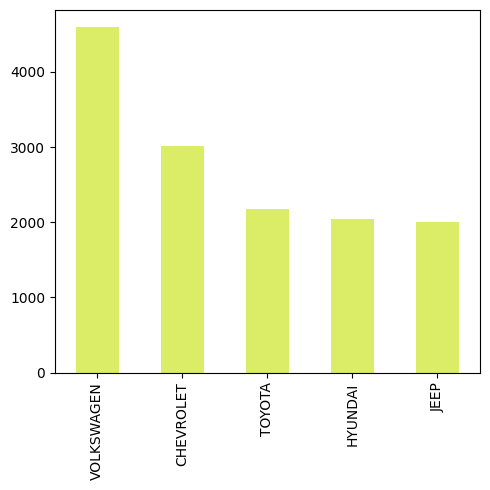

In [70]:
#Top 5 marcas mais vendidas
valid_car_df.marca.value_counts().sort_values(ascending=False)[:5].plot(kind='bar')

In [71]:
valid_car_df.tipo.fillna('tipo', inplace=True)

<ipython-input-71-6792df9619c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_car_df.tipo.fillna('tipo', inplace=True)


<Axes: >

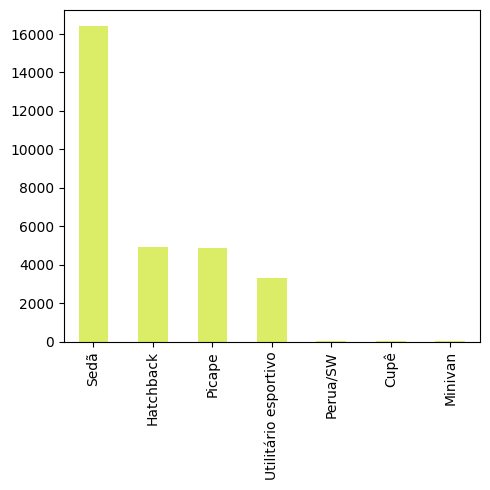

In [72]:
valid_car_df.tipo.value_counts()[:20].plot(kind='bar')

<Axes: >

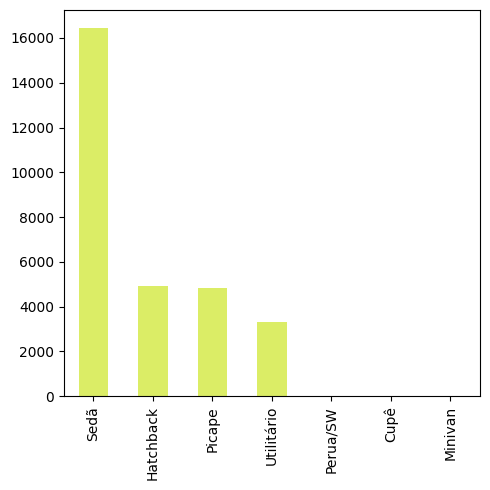

In [73]:
#models should be extracted, because we are not interested in full model type, just main
valid_car_df.tipo.apply(lambda x: x.split(' ')[0]).value_counts()[:20].plot(kind='bar')

Text(0, 0.5, 'preco_medio')

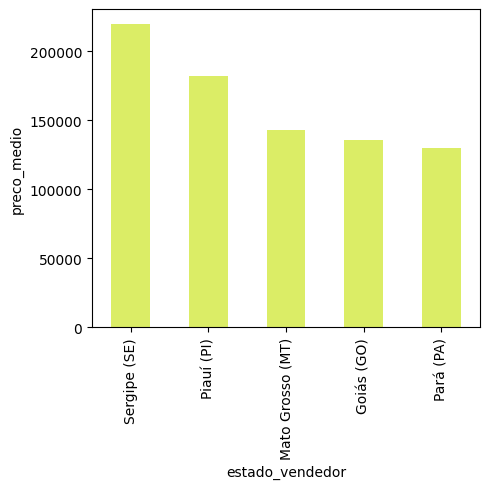

In [74]:
#Top 5 Estados com maior preço médio para carros:
valid_car_df.groupby('estado_vendedor').preco.median().sort_values(ascending=False)[:5].plot(kind='bar')
plt.ylabel('preco_medio')

In [77]:
valid_car_df.preco.max()

1359812.8923094273

In [78]:
price_for_plot = valid_car_df[valid_car_df.preco <= 3000000]\
                 .drop(valid_car_df[valid_car_df.preco == 0].index)\
                 .preco

In [79]:
def thousands(x, pos):
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    else:
        return '${:,.0f}k'.format(x*1e-3)

Text(0.5, 0, 'preco coluna')

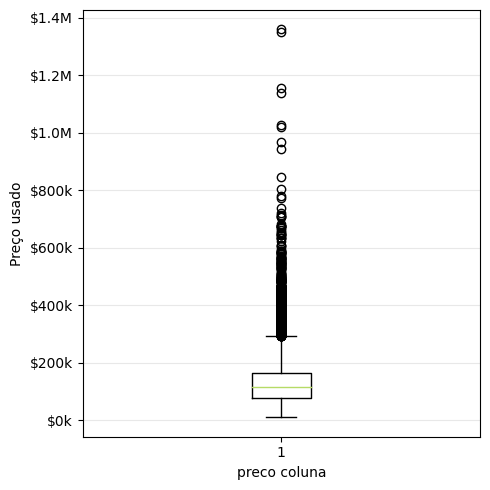

In [80]:
#Let's look on price distribution after taking those, which price < 3000000
fig, ax = plt.subplots()
ax.boxplot(price_for_plot)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.yaxis.set_major_formatter(thousands)
ax.set_ylabel('Preço usado')
ax.set_xlabel('preco coluna')

Text(0, 0.5, 'Hodometro Médio')

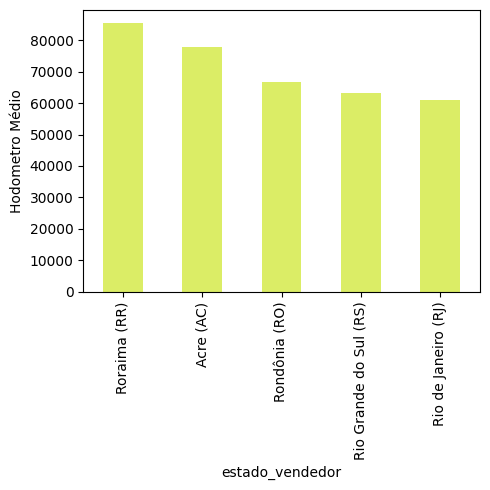

In [82]:
#GET TOP 5 States Where Cars Had Highest Odometer readings¶
valid_car_df.groupby(['estado_vendedor']).hodometro.median().sort_values(ascending=False)[:5].plot(kind='bar')
plt.ylabel('Hodometro Médio')

Text(0, 0.5, 'Media hodometro')

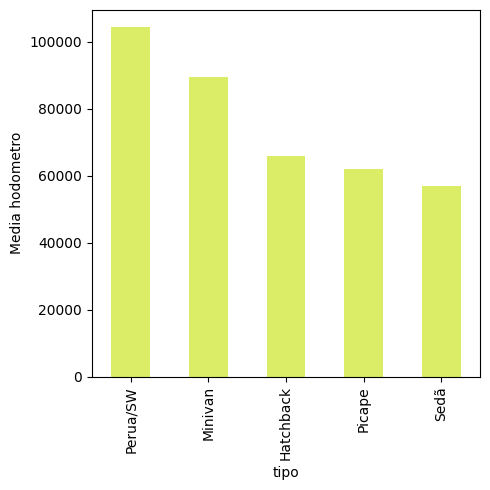

In [84]:
valid_car_df.groupby(['tipo']).hodometro.median().sort_values(ascending=False)[:5].plot(kind='bar')
plt.ylabel('Media hodometro')

1. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
2. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
3.
Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [96]:
#Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
marca = car_dataset['marca'].value_counts()
print(marca)

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
others           1065
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
Name: marca, dtype: int64


In [99]:
#definindo as 5 marcas + populares
carro_popular  = car_dataset['marca'].value_counts().head(5)
print(carro_popular)

VOLKSWAGEN    4594
CHEVROLET     3020
TOYOTA        2180
HYUNDAI       2043
JEEP          2000
Name: marca, dtype: int64


In [100]:
carro_popular.to_frame()

,marca
VOLKSWAGEN,4594
CHEVROLET,3020
TOYOTA,2180
HYUNDAI,2043
JEEP,2000


In [104]:
marca_counts = carro_popular.value_counts().to_frame()
marca_counts.rename(columns={'carro_popular':'value_counts'}, inplace=True)
marca_counts

,marca
4594,1
3020,1
2180,1
2043,1
2000,1


In [106]:
marca_counts.index.name = 'carro_popular'
marca_counts

,marca
carro_popular,
4594,1
3020,1
2180,1
2043,1
2000,1


In [107]:
# engine-location as variable
engine_loc_counts = car_dataset['marca'].value_counts().to_frame()
engine_loc_counts.rename(columns={'marca': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
VOLKSWAGEN,4594
CHEVROLET,3020
TOYOTA,2180
HYUNDAI,2043
JEEP,2000
FIAT,1918
BMW,1784
AUDI,1698
PEUGEOT,1675


In [108]:
car_dataset['estado_vendedor'].unique()


array(['São Paulo (SP)', 'Minas Gerais (MG)', 'Rio de Janeiro (RJ)',
       'Santa Catarina (SC)', 'Rio Grande do Sul (RS)',
       'Rio Grande do Norte (RN)', 'Pará (PA)', 'Goiás (GO)',
       'Paraná (PR)', 'Bahia (BA)', 'Pernambuco (PE)', 'Tocantins (TO)',
       'Alagoas (AL)', 'Paraíba (PB)', 'Mato Grosso do Sul (MS)',
       'Amazonas (AM)', 'Mato Grosso (MT)', 'Maranhão (MA)', 'Acre (AC)',
       'Ceará (CE)', 'Sergipe (SE)', 'Roraima (RR)',
       'Espírito Santo (ES)', 'Piauí (PI)', 'Rondônia (RO)'], dtype=object)

In [112]:
df_group_one = car_dataset[['estado_vendedor','tipo','preco']]


In [114]:
# grouping results
df_group_one = df_group_one.groupby(['estado_vendedor'],as_index=False).mean()
df_group_one

<ipython-input-114-a14d6c4427a2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['estado_vendedor'],as_index=False).mean()


,estado_vendedor,preco
0,Acre (AC),93106.525083
1,Alagoas (AL),129906.553416
2,Amazonas (AM),85051.223887
3,Bahia (BA),129285.733262
4,Ceará (CE),102755.663320
5,Espírito Santo (ES),96534.373882
6,Goiás (GO),153416.087865
7,Maranhão (MA),121041.689127
8,Mato Grosso (MT),143297.450639
9,Mato Grosso do Sul (MS),113270.313388


In [125]:
# grouping results
df_gptest = car_dataset[['estado_vendedor','tipo','marca','preco']]
grouped_test1 = df_gptest.groupby(['estado_vendedor','tipo','marca'],as_index=False).mean()
grouped_test1

,estado_vendedor,tipo,marca,preco
0,Acre (AC),Hatchback,BMW,125551.081245
1,Acre (AC),Hatchback,CHEVROLET,55863.198348
2,Acre (AC),Hatchback,CITROËN,115641.061186
3,Acre (AC),Hatchback,HYUNDAI,59806.779254
4,Acre (AC),Hatchback,MITSUBISHI,178198.478465
...,...,...,...,...
890,Tocantins (TO),Picape,TOYOTA,164639.751746
891,Tocantins (TO),Picape,VOLKSWAGEN,121772.918859
892,Tocantins (TO),Sedã,CHEVROLET,97433.993085
893,Tocantins (TO),Sedã,HONDA,95508.003499


In [134]:
df_gptest = car_dataset[['estado_vendedor','tipo','marca','preco']]
grouped_test2 = df_gptest.groupby(['estado_vendedor','tipo', 'marca'],as_index=False).mean()
grouped_test2

,estado_vendedor,tipo,marca,preco
0,Acre (AC),Hatchback,BMW,125551.081245
1,Acre (AC),Hatchback,CHEVROLET,55863.198348
2,Acre (AC),Hatchback,CITROËN,115641.061186
3,Acre (AC),Hatchback,HYUNDAI,59806.779254
4,Acre (AC),Hatchback,MITSUBISHI,178198.478465
...,...,...,...,...
890,Tocantins (TO),Picape,TOYOTA,164639.751746
891,Tocantins (TO),Picape,VOLKSWAGEN,121772.918859
892,Tocantins (TO),Sedã,CHEVROLET,97433.993085
893,Tocantins (TO),Sedã,HONDA,95508.003499


In [149]:
grouped_test2.value_counts()

estado_vendedor         tipo                  marca       preco        
Acre (AC)               Hatchback             BMW         125551.081245    1
Rio Grande do Sul (RS)  Utilitário esportivo  HONDA       161581.928245    1
                        Sedã                  RENAULT     79491.856797     1
                                              TOYOTA      99691.629743     1
                                              VOLKSWAGEN  121423.581202    1
                                                                          ..
Minas Gerais (MG)       Picape                PORSCHE     293580.485675    1
                                              RENAULT     149551.785907    1
                                              TOYOTA      209545.348242    1
                                              VOLKSWAGEN  158756.106462    1
Tocantins (TO)          Sedã                  PEUGEOT     131273.319223    1
Length: 895, dtype: int64

In [152]:

# printing names and count using loop.
for idx, name in enumerate(grouped_test2['tipo'].value_counts().index.tolist()):
    print('Tipo :', name)
    print('Counts :', grouped_test2['estado_vendedor'].value_counts()[idx])

Tipo : Sedã
Counts : 97
Tipo : Hatchback
Counts : 79
Tipo : Picape
Counts : 77
Tipo : Utilitário esportivo
Counts : 76
Tipo : Cupê
Counts : 75
Tipo : Perua/SW
Counts : 74
Tipo : Minivan
Counts : 69


In [155]:
# printing names and count using loop.
for idx, name in enumerate(grouped_test2['estado_vendedor'].value_counts().index.tolist()):
    print('Estado :', name)
    print('Counts :', grouped_test2['tipo'].value_counts())

Estado : São Paulo (SP)
Counts : Sedã                    280
Hatchback               201
Picape                  196
Utilitário esportivo    180
Cupê                     18
Perua/SW                 13
Minivan                   7
Name: tipo, dtype: int64
Estado : Paraná (PR)
Counts : Sedã                    280
Hatchback               201
Picape                  196
Utilitário esportivo    180
Cupê                     18
Perua/SW                 13
Minivan                   7
Name: tipo, dtype: int64
Estado : Rio de Janeiro (RJ)
Counts : Sedã                    280
Hatchback               201
Picape                  196
Utilitário esportivo    180
Cupê                     18
Perua/SW                 13
Minivan                   7
Name: tipo, dtype: int64
Estado : Rio Grande do Sul (RS)
Counts : Sedã                    280
Hatchback               201
Picape                  196
Utilitário esportivo    180
Cupê                     18
Perua/SW                 13
Minivan                   7

1. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
2. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
3. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [161]:
# printing names and count using loop.
for idx, name in enumerate(grouped_test2['estado_vendedor'].value_counts().index.tolist()):
    print('Estado :', name)
    print('Counts :', grouped_test2['marca'].value_counts())

Estado : São Paulo (SP)
Counts : CHEVROLET        72
VOLKSWAGEN       69
FIAT             61
TOYOTA           58
HYUNDAI          57
FORD             51
BMW              48
HONDA            45
PEUGEOT          45
others           43
RENAULT          40
AUDI             39
MITSUBISHI       39
MERCEDES-BENZ    39
NISSAN           36
PORSCHE          32
VOLVO            28
JEEP             26
KIA              24
CITROËN          22
LAND ROVER       21
Name: marca, dtype: int64
Estado : Paraná (PR)
Counts : CHEVROLET        72
VOLKSWAGEN       69
FIAT             61
TOYOTA           58
HYUNDAI          57
FORD             51
BMW              48
HONDA            45
PEUGEOT          45
others           43
RENAULT          40
AUDI             39
MITSUBISHI       39
MERCEDES-BENZ    39
NISSAN           36
PORSCHE          32
VOLVO            28
JEEP             26
KIA              24
CITROËN          22
LAND ROVER       21
Name: marca, dtype: int64
Estado : Rio de Janeiro (RJ)
Counts : CHEVROL

1. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Baseado na marca Volkswagen que é a marca que mais tem carros a venda no dataset, o estado de SP é o que mais tem carro dessa marca.
São Paulo (SP) tambem é o que mais tem carros Sedã=280 e Hatchback=201 de todo o dataset.


Proxima pergunta: Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?


In [205]:
cambio_counts = car_dataset[['cambio', 'estado_vendedor']].value_counts().to_frame()
cambio_counts.rename(columns={'quantidade':'value_counts'}, inplace=True)
cambio_counts

0
cambio       estado_vendedor                
Automática   São Paulo (SP)            12401
Manual       São Paulo (SP)             2839
Automática   Rio de Janeiro (RJ)        1957
             Paraná (PR)                1953
             Santa Catarina (SC)        1818
...                                      ...
CVT          Mato Grosso (MT)              1
             Pará (PA)                     1
             Rio Grande do Norte (RN)      1
Manual       Piauí (PI)                    1
Automatizada Bahia (BA)                    1

[99 rows x 1 columns]

In [211]:
cambio_counts = car_dataset[['cambio', 'estado_vendedor','tipo']].value_counts().to_frame()
cambio_counts.rename(columns={'quantidade':'value_counts'}, inplace=True)
cambio_counts

0
cambio                estado_vendedor     tipo                      
Automática            São Paulo (SP)      Sedã                  7306
                                          Picape                1712
                                          Utilitário esportivo  1706
                                          Hatchback             1651
                      Paraná (PR)         Sedã                  1141
...                                                              ...
CVT                   Acre (AC)           Sedã                     1
Automática Sequencial São Paulo (SP)      Utilitário esportivo     1
Automatizada          Goiás (GO)          Sedã                     1
Automática Sequencial Santa Catarina (SC) Sedã                     1
                      São Paulo (SP)      Hatchback                1

[289 rows x 1 columns]

Melhor estado pra comprar uma picate automatica é Sao Paulo pois existem 1712

In [186]:
df_gptest = car_dataset[['estado_vendedor','tipo','cambio']]
grouped_test3 = df_gptest.groupby(['estado_vendedor','tipo', 'cambio'],as_index=False)
grouped_test3

In [183]:
# printing names and count using loop.
for idx, name in enumerate(grouped_test3['estado_vendedor'].value_counts().index.tolist()):
    print('Estado:', name)
    print('Tipo:', grouped_test3['tipo'].value_counts())
    print('Counts :', grouped_test3['cambio'].value_counts())

Estado: São Paulo (SP)
Tipo: Sedã                    88
Hatchback               73
Picape                  60
Utilitário esportivo    46
Cupê                    11
Perua/SW                 9
Minivan                  2
Name: tipo, dtype: int64
Counts : Automática               95
Manual                   78
CVT                      51
Automatizada             23
Automatizada DCT         18
Semi-automática          13
Automática Sequencial    11
Name: cambio, dtype: int64
Estado: Paraná (PR)
Tipo: Sedã                    88
Hatchback               73
Picape                  60
Utilitário esportivo    46
Cupê                    11
Perua/SW                 9
Minivan                  2
Name: tipo, dtype: int64
Counts : Automática               95
Manual                   78
CVT                      51
Automatizada             23
Automatizada DCT         18
Semi-automática          13
Automática Sequencial    11
Name: cambio, dtype: int64
Estado: Santa Catarina (SC)
Tipo: Sedã               

In [213]:
cambio_counts = car_dataset[['garantia_de_fábrica', 'estado_vendedor', 'tipo']].value_counts().to_frame()
cambio_counts.rename(columns={'quantidade':'value_counts'}, inplace=True)
cambio_counts

0
garantia_de_fábrica estado_vendedor     tipo                      
Garantia de fábrica São Paulo (SP)      Sedã                  1203
                                        Utilitário esportivo   464
                                        Picape                 356
                                        Hatchback              282
                    Paraná (PR)         Sedã                   212
...                                                            ...
                    Acre (AC)           Picape                   1
                    Paraná (PR)         Cupê                     1
                    Espírito Santo (ES) Picape                   1
                    Ceará (CE)          Sedã                     1
                    Tocantins (TO)      Picape                   1

[72 rows x 1 columns]

SP tem Garantia de fábrica	São Paulo (SP)	de 2307, onde 1203 sao do tipo seda. O segundo estado com melhor garantia é o Parana com 212 carros tipo seda. Os piores estado para comprar uma Picape com garantia sao os estados do Acre, Espírito Santo e o Tocantins que só tem 1 carro disponivel em cada estado.

In [214]:
cambio_counts = car_dataset[['marca', 'estado_vendedor', 'preco']].value_counts().to_frame()
cambio_counts.rename(columns={'quantidade':'value_counts'}, inplace=True)
cambio_counts

0
marca   estado_vendedor     preco          
AUDI    Bahia (BA)          5.150986e+04  1
PEUGEOT Santa Catarina (SC) 1.274756e+05  1
                            1.264202e+05  1
                            1.193076e+05  1
                            1.188847e+05  1
...                                      ..
HONDA   Paraná (PR)         1.045344e+05  1
                            1.028217e+05  1
                            1.020050e+05  1
                            1.017379e+05  1
others  São Paulo (SP)      1.154360e+06  1

[29584 rows x 1 columns]